# AtliQ Hotels Data Analysis Project

Importing pandas as a module


In [1]:
import pandas as pd

# 1.Data Importation and exploration to understand the datasets

Importing CSV files in Data Frames using pandas module

In [2]:
df_bookings=pd.read_csv('fact_bookings.csv')
df_date=pd.read_csv('dim_date.csv')
df_rooms=pd.read_csv('dim_rooms.csv')
df_agg_bookings=pd.read_csv('fact_aggregated_bookings.csv')
df_hotels=pd.read_csv('dim_hotels.csv')

Now lets view each data frame and understand each dataframe and its significance

In [3]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
df_bookings.revenue_realized.max()

45220

Now lets check how many rows and columns are there in the above data frame


In [5]:
df_bookings.shape

(134590, 12)

134590 rows and 12 columns

Just by displaying the dataframe itself we found a error such as no_guests has negative values.
Other thing is that if a booking is cancelled that means a specific amount is refunded to the customer and other specific amount is taken by the hotel as a penalty thats why there is a difference between the revenue_generated and revenue_realized in the records whos bookind_status is cancelled.

# Now lets do some exploratory tasks  

In [6]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


Here We can see that the columns containing dates are object which we might need to convert to datetime format in future for analysis

In [7]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

# We can now know the number of bookings through each platform

In [8]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

We will now plot a simple bar chart for better understanding 

<Axes: xlabel='booking_platform'>

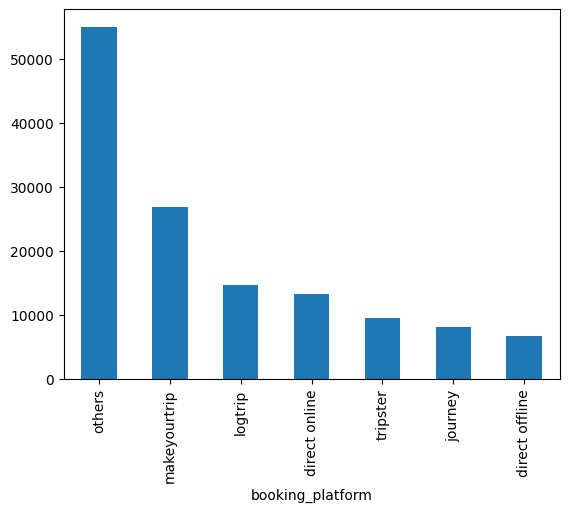

In [9]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

# Same visualization using Seaborn and Matplotlib library

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

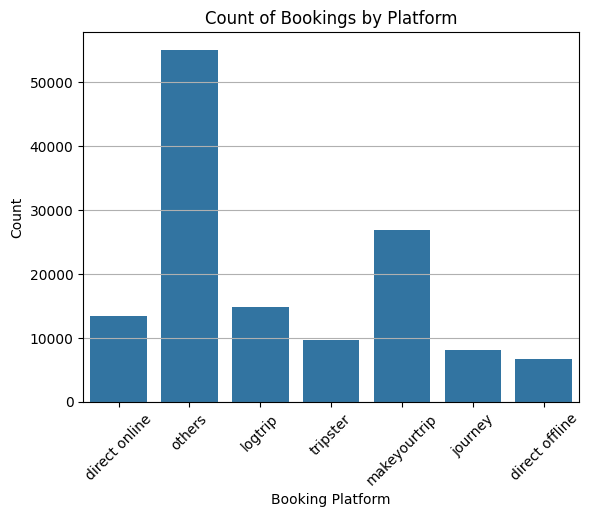

In [11]:
# Create a count plot using Seaborn
sns.countplot(x='booking_platform',data=df_bookings)
plt.title('Count of Bookings by Platform')# Add a title
plt.xlabel('Booking Platform')# Label for x-axis
plt.ylabel('Count')# Label for y-axis
plt.xticks(rotation=45)# Rotate x-axis labels for better readability
plt.grid(axis='y')# Add grid lines for y-axis

As Seaborn is build on top of Matplotlib,its better to use it together by creating plot using seaborn and modifying using Matplotlib.


In [12]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


As by using describe function we now get common metrics of the dataframe.As we can see the number of guest has negative values.Which we will clean in the cleaning process.Also we would check for the maximum value in revenue_realized, if it is true or wrong answer.

In [13]:
 df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

As we display the null values we got to know that not all customers have left a review after their visit which is understandable.

Now we check for the unique values in dataframe to check if there is any abnormality in the data entered

In [14]:
df_bookings.property_id.unique()

array([16558, 16559, 16560, 16561, 16562, 16563, 17558, 17559, 17560,
       17561, 17562, 17563, 18558, 18559, 18560, 18561, 18562, 18563,
       19558, 19559, 19560, 19561, 19562, 19563, 17564], dtype=int64)

In [15]:
df_bookings.no_guests.unique()

array([ -3.,   2.,  -2.,   4.,   1.,   3.,  nan,   6.,   5., -10., -12.,
        -6.,  -4., -17.,  -1.])

In [16]:
df_bookings.ratings_given.unique()

array([ 1., nan,  5.,  4.,  3.,  2.])

In [17]:
df_bookings.revenue_generated.unique()

array([   10010,     9100,  9100000,    10920,    12600,    13860,
          15120,    18480,    20160,    16800,    26600,    11050,
          12155,    13260,    16830,    15300,    18360,    20400,
       28560000,    22440,    28560,    38760,    32300,    45220,
          35530,    41990,    21840,    34580,    23520,    29260,
          31920, 12600000,    24480,  2000000,    26520,     7150,
           6500,     7800,     9000,     9900,    10800,    12000,
          13200,    19000,    20900,    22800,    24700,    14400,
          15600,     9750,    11700,    10725,    13500,    14850,
          16200,    18000,    19800,    23400,    28500,    25200,
          34200,    39900,    31350,    21600,    37240,    37050,
       10000000], dtype=int64)

In [18]:
df_bookings.revenue_realized.unique()

array([10010,  3640,  9100, 10920, 12600,  5544,  5040, 15120,  6048,
       13860, 18480, 20160, 16800, 10640, 26600, 11050,  4420, 12155,
        4862,  5304, 13260, 16830, 15300,  7344, 18360,  6120,  8160,
       28560,  8976, 22440, 20400, 11424, 38760, 12920, 45220, 32300,
       35530, 41990, 15504,  4004,  8736,  6720, 34580,  7392,  9408,
       11704, 13832, 12768, 21840, 29260,  6732,  9792, 10608, 24480,
       26520,  7150,  6500,  2600,  7800,  9000,  9900, 10800,  3600,
        4800, 13200, 12000,  5280, 19000, 20900, 22800, 24700,  9120,
        7600,  3960,  4320, 14400,  2860,  3120,  8360, 15600,  9880,
        9750, 11700,  3900, 10725,  4680, 13500,  5400, 14850, 16200,
       18000,  7200,  7920,  9360, 19800, 28500,  4290,  5940, 25200,
        6480, 23400, 11400, 34200, 39900, 31350, 21600, 15960,  4368,
       14212, 23520, 37240, 31920,  8064,  5760,  8640, 10080, 18088,
        6240, 37050, 14820, 16796, 14896, 13680, 12540], dtype=int64)

In [19]:
df_bookings.check_in_date.unique()

array(['1/5/2022', '2/5/2022', '3/5/2022', '4/5/2022', '5/5/2022',
       '6/5/2022', '7/5/2022', '8/5/2022', '9/5/2022', '10/5/2022',
       '11/5/2022', '12/5/2022', '13-05-22', '14-05-22', '15-05-22',
       '16-05-22', '17-05-22', '18-05-22', '19-05-22', '20-05-22',
       '21-05-22', '22-05-22', '23-05-22', '24-05-22', '25-05-22',
       '26-05-22', '27-05-22', '28-05-22', '29-05-22', '30-05-22',
       '31-05-22', '1/6/2022', '2/6/2022', '3/6/2022', '4/6/2022',
       '5/6/2022', '6/6/2022', '7/6/2022', '8/6/2022', '9/6/2022',
       '10/6/2022', '11/6/2022', '12/6/2022', '13-06-22', '14-06-22',
       '15-06-22', '16-06-22', '17-06-22', '18-06-22', '19-06-22',
       '20-06-22', '21-06-22', '22-06-22', '23-06-22', '24-06-22',
       '25-06-22', '26-06-22', '27-06-22', '28-06-22', '29-06-22',
       '30-06-22', '1/7/2022', '2/7/2022', '3/7/2022', '4/7/2022',
       '5/7/2022', '6/7/2022', '7/7/2022', '8/7/2022', '9/7/2022',
       '10/7/2022', '11/7/2022', '12/7/2022', '13-07-22'

In [20]:
df_bookings.check_in_date.nunique()

92

# Now lets explore other dataframes

In [21]:
df_date.head()


,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [22]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


Here also the column containing dates are in object format which we might need to change to time format in future.

In [23]:
df_date.shape

(92, 4)

In [24]:
df_date.isnull().sum()

date        0
mmm yy      0
week no     0
day_type    0
dtype: int64

In [25]:
df_date.describe()

,date,mmm yy,week no,day_type
count,92,92,92,92
unique,92,3,14,2
top,01-May-22,May 22,W 19,weekeday
freq,1,31,7,65


In [26]:
df_date.date.unique()

array(['01-May-22', '02-May-22', '03-May-22', '04-May-22', '05-May-22',
       '06-May-22', '07-May-22', '08-May-22', '09-May-22', '10-May-22',
       '11-May-22', '12-May-22', '13-May-22', '14-May-22', '15-May-22',
       '16-May-22', '17-May-22', '18-May-22', '19-May-22', '20-May-22',
       '21-May-22', '22-May-22', '23-May-22', '24-May-22', '25-May-22',
       '26-May-22', '27-May-22', '28-May-22', '29-May-22', '30-May-22',
       '31-May-22', '01-Jun-22', '02-Jun-22', '03-Jun-22', '04-Jun-22',
       '05-Jun-22', '06-Jun-22', '07-Jun-22', '08-Jun-22', '09-Jun-22',
       '10-Jun-22', '11-Jun-22', '12-Jun-22', '13-Jun-22', '14-Jun-22',
       '15-Jun-22', '16-Jun-22', '17-Jun-22', '18-Jun-22', '19-Jun-22',
       '20-Jun-22', '21-Jun-22', '22-Jun-22', '23-Jun-22', '24-Jun-22',
       '25-Jun-22', '26-Jun-22', '27-Jun-22', '28-Jun-22', '29-Jun-22',
       '30-Jun-22', '01-Jul-22', '02-Jul-22', '03-Jul-22', '04-Jul-22',
       '05-Jul-22', '06-Jul-22', '07-Jul-22', '08-Jul-22', '09-J

In [27]:
df_date['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [28]:
df_date['week no'].unique()

array(['W 19', 'W 20', 'W 21', 'W 22', 'W 23', 'W 24', 'W 25', 'W 26',
       'W 27', 'W 28', 'W 29', 'W 30', 'W 31', 'W 32'], dtype=object)

In [29]:
df_date['day_type'].unique()

array(['weekend', 'weekeday'], dtype=object)

We found one more error weekeday should be weekday.

By using describe we can see all the relevent details of the dataframe.

In [30]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [31]:
df_hotels.shape

(25, 4)

In [32]:
df_hotels.isnull().sum()

property_id      0
property_name    0
category         0
city             0
dtype: int64

In [33]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes


In [34]:
df_hotels.describe()

,property_id
count,25.000000
mean,18040.640000
std,1122.436371
min,16558.000000
25%,17558.000000
50%,17564.000000
75%,18563.000000
max,19563.000000


In [35]:
df_hotels.property_id.unique()

array([16558, 16559, 16560, 16561, 16562, 16563, 17558, 17559, 17560,
       17561, 17562, 17563, 18558, 18559, 18560, 18561, 18562, 18563,
       19558, 19559, 19560, 19561, 19562, 19563, 17564], dtype=int64)

In [36]:
df_hotels.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [37]:
df_hotels.category.unique()

array(['Luxury', 'Business'], dtype=object)

In [38]:
df_hotels.city.unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

In [39]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [40]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [41]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [42]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [43]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

So in capacity we got two enteries as null.


As we have found out earlier that the null values are present in the capacity column in the dataframe we now display them real quick and drop those entries as they serve no purpose.As it is not found in any other dataframe.


In [44]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [45]:
df_agg_bookings.check_in_date.unique()

array(['1-May-22', '2-May-22', '3-May-22', '4-May-22', '5-May-22',
       '6-May-22', '7-May-22', '8-May-22', '9-May-22', '10-May-22',
       '11-May-22', '12-May-22', '13-May-22', '14-May-22', '15-May-22',
       '16-May-22', '17-May-22', '18-May-22', '19-May-22', '20-May-22',
       '21-May-22', '22-May-22', '23-May-22', '24-May-22', '25-May-22',
       '26-May-22', '27-May-22', '28-May-22', '29-May-22', '30-May-22',
       '31-May-22', '1-Jun-22', '2-Jun-22', '3-Jun-22', '4-Jun-22',
       '5-Jun-22', '6-Jun-22', '7-Jun-22', '8-Jun-22', '9-Jun-22',
       '10-Jun-22', '11-Jun-22', '12-Jun-22', '13-Jun-22', '14-Jun-22',
       '15-Jun-22', '16-Jun-22', '17-Jun-22', '18-Jun-22', '19-Jun-22',
       '20-Jun-22', '21-Jun-22', '22-Jun-22', '23-Jun-22', '24-Jun-22',
       '25-Jun-22', '26-Jun-22', '27-Jun-22', '28-Jun-22', '29-Jun-22',
       '30-Jun-22', '1-Jul-22', '2-Jul-22', '3-Jul-22', '4-Jul-22',
       '5-Jul-22', '6-Jul-22', '7-Jul-22', '8-Jul-22', '9-Jul-22',
       '10-Jul-22',

In [46]:
df_agg_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [47]:
df_agg_bookings.successful_bookings.unique()

array([ 25,  28,  23,  30,  18,  22,  24,  16,  20, 100,  26,  12,  21,
        11,  29,  31,  34,   9,  32,  38,  37,  35,  33,  40,  19,  36,
        27,  15,  17,   8,  13,  14,   2,   4,   5,   6,  10,   3,   7,
         1,  39,  50,  43,  41, 123], dtype=int64)

In [48]:
df_agg_bookings.capacity.unique()

array([30., 19., 40., 26., nan, 34., 18., 31., 41., 32., 25., 15., 42.,
       33., 38., 27., 24., 36., 16., 23., 29., 50., 43., 22., 39., 44.,
       45., 21., 20.,  8.,  3.,  6.,  7., 10., 13.,  9., 17., 14.,  4.])

In [49]:
df_agg_bookings[df_agg_bookings['capacity'].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


# 1.Finding out unique property ids in aggregate bookings dataset

In [50]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

# 2.Finding out total Bookings per property_id

In [51]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

# 3.Finding out days on which bookings are greater than capacity

In [52]:
df_agg_bookings[df_agg_bookings.capacity<df_agg_bookings.successful_bookings]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


# 4.Find out properties that have highest capacity

In [53]:
n=df_agg_bookings.capacity.max()
df_agg_bookings[df_agg_bookings['capacity']==n]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


The above result shows all the records of the property that has the maximum capacity.

Now if we only want to show the property we can use.

In [54]:
df_agg_bookings[df_agg_bookings["capacity"] == n].groupby("property_id")[['room_category','capacity']].max()

,room_category,capacity
property_id,,
17558,RT2,50.0


# Data Cleaning  Process

In [55]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


# A.Cleaning invalid guests that means we clear out the columns that have no_guests as negative values.

In [56]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [57]:
df_bookings['no_guests'][df_bookings['no_guests'] <= 0].count()

9

We now able to get how many records have negative no of guests.

As we can see that there are few enteries with guests less than 0 value which is an invalid answer.We can use any of the various ways such as dropping those records or filling the no_guests with any other value with the use of any function such as mean or max of the positive values etc.

In [58]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [59]:
def neg(g):
    if g<=0:
        return -g
    else: 
        return  g
df_bookings['no_guests']=df_bookings.apply(lambda x:neg(x['no_guests']),axis=1)


As there we only few Negative values we can consider it as a typo error and convert the non positive numbers into positive numbers

In [60]:
(df_bookings[df_bookings['property_id']==16558])

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
132973,Jul312216558RT35,16558,29-07-22,31-07-22,5/8/2022,4.0,RT3,makeyourtrip,NaN,Cancelled,20160,8064
132974,Jul312216558RT36,16558,27-07-22,31-07-22,2/8/2022,2.0,RT3,others,NaN,Cancelled,16800,6720
132975,Jul312216558RT37,16558,28-07-22,31-07-22,6/8/2022,2.0,RT3,direct online,NaN,Checked Out,16800,16800
132976,Jul312216558RT41,16558,26-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,5.0,Checked Out,37240,37240


We took one of the proeprty_id of the record which had a negative value in the no of guests and then print it to find out if the values have been changed or not.

def neg(n,g):
    if g<=0:
        q=df_bookings[df_bookings['property_id']==n]['no_guests'].max()
        return q
    else: 
        return  g
df_bookings['no_guests']=df_bookings.apply(lambda x:neg(x['property_id'],x['no_guests']),axis=1)
(df_bookings)




We can use the above code if we want to find the max of the no_guests of a property.

# B.Outlier Removal in Revenue Generated and Revenue Realized

In [61]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.037047,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.033158,1.235009,9.303604e+04,6928.108124
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,17.000000,5.000000,2.856000e+07,45220.000000


To find out the outliers we use Z Score Method.


In [62]:
min,max=df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()
min,max

(6500, 28560000)

std stands for Standard Deviation.Standard deviation tells us how spread out are values from the mean.The std is found in such a way that each value is subracted from mean and then these values are squared and then its sum is divided by the total count.


In [63]:
mean,std = df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()
mean,std

(15378.05412734973, 93036.03867095453)

In this method we use  a formula to find out the higher_limit.Whatever value comes after that value is considered as a outlier.Vice versa for lower_limit

In [64]:
higher_limit=mean+3*std
higher_limit

294486.17014021333

In [65]:
lower_limit=mean-3*std
lower_limit

-263730.06188551383

lets check if the revenue generated has any negative values.

In [66]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [67]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [68]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


Since there is a vast difference between the revenue generated and revenue realized.And also the rooms above the higher_limit is of standard,elite,premium.And main fact is that no room would cost this much.So we remove those records.

In [69]:
df_bookings.shape

(134590, 12)

In [70]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(134585, 12)

Now lets check the Revenue Realized.

In [71]:
df_bookings.revenue_realized.describe()

count    134585.000000
mean      12696.095025
std        6928.058192
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [72]:
mean_r,std_r=df_bookings.revenue_realized.mean(),df_bookings.revenue_realized.std()
mean_r,std_r

(12696.095025448602, 6928.058192036858)

In [73]:
min_r,max_r=df_bookings.revenue_realized.min(),df_bookings.revenue_realized.max()
min_r,max_r

(2600, 45220)

Now lets create the higher limit and lower limit.

In [74]:
higher_limit_r,lower_limit_r=mean_r+3*std_r,mean_r-3*std_r
higher_limit_r,lower_limit_r

(33480.26960155918, -8088.0795506619725)

Now lets check if the revenue realized has any negative values.

In [75]:
df_bookings[df_bookings['revenue_realized']<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [76]:
df_bookings[df_bookings.revenue_realized>higher_limit_r]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,31-07-22,31-07-22,1/8/2022,4.0,RT4,makeyourtrip,4.0,Checked Out,38760,38760


In [77]:
df_bookings['room_category'][df_bookings.revenue_realized>higher_limit_r].unique()

array(['RT4'], dtype=object)

Upon reviewing the room categories, we found that all values exceeding the upper limit belong to the RT4 category, with the highest value recorded at 45,220. Given that presidential suites are priced significantly higher, we do not classify these instances as outliers.

To verify again we can find the std and mean for only the RT4 room category.From those we can find outlier cut off limits.

In [78]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()


count    16073.000000
mean     23440.103652
std       9048.865206
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

Now lets check the higher limit and check if the maximum value comes within the higher limit.

In [79]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.mean()+3*df_bookings[df_bookings.room_category=="RT4"].revenue_realized.std()

50586.69926930781

Subsequently, we confirmed that the maximum value falls within the upper limit, reinforcing our conclusion that these values do not qualify as outliers. In cases where a value appears to exceed the established outlier threshold, we will calculate the mean and upper limit for that specific category to determine if they should be classified as outliers.

In [80]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77905
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Since the rating is null for a large number of records we should not fill  those null values with anything.

# C.Since we have found the Category to be null in few records of def_agg_bookings lets fix it.

In [81]:
df_agg_bookings[df_agg_bookings['capacity'].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


Lets fill those values null values with median.

In [82]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)


We can also use other operations like filling a null value by its mean or null according to the characteristics of data series or according to the business type.We can also use other functions etc to fill the null values.

    
    
    

    
    
ex-df_agg_bookings['capacity'].fillna(df_agg_bookings['capacity'].mean(), inplace=True) 
ex-df_agg_bookings['capacity'].fillna(method='ffill', inplace=True)
ex-df_agg_bookings['capacity'].fillna(method='bfill', inplace=True)
ex-df_agg_bookings.dropna(subset=['capacity'], inplace=True)


Checking if the operation has happened or not.

In [83]:
df_agg_bookings[df_agg_bookings['capacity'].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity


The null values has been replaced with median.

# D.Since we have found that in def_agg_bookings few records have successfully bookings greater than capacity,lets fix those.

In [84]:
df_agg_bookings[df_agg_bookings.capacity<df_agg_bookings.successful_bookings]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


Since the values are wrong here and the records are of less number we can remove those records.

In [85]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]


Lets now check if the operation  has been done or not.

In [86]:
df_agg_bookings[df_agg_bookings.capacity<df_agg_bookings.successful_bookings]

,property_id,check_in_date,room_category,successful_bookings,capacity


The records has been successfully removed.

# E.Lets correct the spelling of values in date data frame.

In [87]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [88]:
def chg(d):
    if d=='weekeday':
        return 'weekday'
    else:
        return d

df_date.day_type=df_date['day_type'].apply(lambda x:chg(x))

In [89]:
df_date['day_type'].unique()

array(['weekend', 'weekday'], dtype=object)

# Data Transformations Process

# Creating a occupance percentage column.

In [90]:
n_c=df_agg_bookings.apply(lambda x: x['successful_bookings']/x['capacity'],axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=n_c)

In [91]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


As we can see a coulmn has been added successfully.

Lets now convert the occ_pct to percentage and also round it.

In [92]:
df_agg_bookings['occ_pct']=df_agg_bookings['occ_pct'].apply(lambda x: round(x*100,2))

In [93]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


Now we have successfully changed.

There are actually manly types of data transformations that can be done


ex 1.Creating columns
ex 2.Normalization
ex 3.Merging data
ex 4.Aggregation

# Insights Generation

# I) What is an average occupancy rate in each room categories?

In [94]:
round(df_agg_bookings.groupby("room_category")["occ_pct"].mean(),2)

room_category
RT1    57.89
RT2    58.01
RT3    58.03
RT4    59.28
Name: occ_pct, dtype: float64

Now lets add other details of each room category.

In [95]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


Now lets df_rooms and df_agg_bookings.

In [96]:
df=pd.merge(df_agg_bookings,df_rooms,left_on="room_category",right_on="room_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard


We use left_on and right_on in the above code since the values on which we can join has two column names in both.

Now we find the name of the rooms.

In [97]:
grouped = df.groupby('room_category').agg( Occupancy_Percent=('occ_pct', 'mean'),Successful_bookings_count=('successful_bookings', 'count'),Room_class=('room_class','first'))
grouped['Occupancy_Percent']=grouped['Occupancy_Percent'].round(2)
print(grouped)

               Occupancy_Percent  Successful_bookings_count    Room_class
room_category                                                            
RT1                        57.89                       2296      Standard
RT2                        58.01                       2299         Elite
RT3                        58.03                       2300       Premium
RT4                        59.28                       2299  Presidential


Now we print the relevant details of the room category that is name and average occupancy rate ,Successful booking count and room class.


# 2. Print average occupancy rate per day.

Now we merge the two dataframes of gotel and agg booking together  to find the solution.

In [98]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [99]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [100]:
grouped_2=pd.merge(df_agg_bookings,df_hotels,on="property_id")
grouped_2.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,16559,1-May-22,RT2,35,41.0,85.37,Atliq Exotica,Luxury,Mumbai
2,16559,1-May-22,RT3,27,32.0,84.38,Atliq Exotica,Luxury,Mumbai
3,16559,1-May-22,RT4,17,18.0,94.44,Atliq Exotica,Luxury,Mumbai
4,16559,2-May-22,RT1,20,30.0,66.67,Atliq Exotica,Luxury,Mumbai


In [101]:
grouped_2.groupby('city')['occ_pct'].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.909181
Name: occ_pct, dtype: float64

# 3. Lets find out when was the occupancy better,weekday or weekend?

In [102]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekday
2,03-May-22,May 22,W 19,weekday
3,04-May-22,May 22,W 19,weekday
4,05-May-22,May 22,W 19,weekday


In [103]:
grouped_3=pd.merge(grouped_2,df_date,left_on="check_in_date",right_on="date")
grouped_3.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT2,25,41.0,60.98,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekday
1,16559,10-May-22,RT1,18,30.0,60.00,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekday
2,16559,10-May-22,RT3,20,32.0,62.50,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekday
3,16559,10-May-22,RT4,13,18.0,72.22,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekday
4,19562,10-May-22,RT1,18,30.0,60.00,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekday


In [104]:
grouped_3.groupby('day_type')['occ_pct'].mean().round(2)

day_type
weekday    50.88
weekend    72.34
Name: occ_pct, dtype: float64

We got to know weekend is better in terms of occupancy rate.

# 4.In the month of June,What is the occupancy for different cities.

In [105]:
df_june_22=grouped_3[grouped_3["mmm yy"]=="Jun 22"]
df_june_22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekday
2203,16559,10-Jun-22,RT4,11,18.0,61.11,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekday
2204,19562,10-Jun-22,RT1,19,30.0,63.33,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekday


In [106]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values()

city
Bangalore    56.44
Mumbai       58.38
Hyderabad    58.46
Delhi        62.47
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

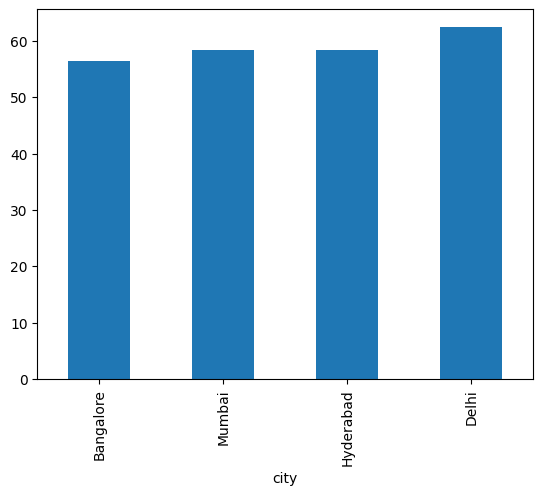

In [107]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values().plot(kind="bar")

# 5.We hot new data for the month of August.Lets Append that to the existing data.

In [108]:
df_august=pd.read_csv("new_data_august.csv")
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [109]:
df_august.day_type.unique()

array(['weekeday'], dtype=object)

In [110]:
df_august

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [111]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [112]:
grouped_3.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'property_name', 'category', 'city', 'date',
       'mmm yy', 'week no', 'day_type'],
      dtype='object')

We have found a small typo error in day type of august dataframe lets quickly fix it.

In [113]:
def typo(x):
    if(x=='weekeday'):
        return 'weekday'
    else:
        return x
df_august['day_type']=df_august['day_type'].apply(lambda x:typo(x))

In [114]:
df_august_renamed=df_august.rename(columns={'occ%':'occ_pct'})
grouped_4=pd.concat([grouped_3,df_august_renamed],ignore_index=True,axis=0)
grouped_4.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type,room_class
0,16559,10-May-22,RT2,25,41.0,60.98,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekday,NaN
1,16559,10-May-22,RT1,18,30.0,60.00,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekday,NaN
2,16559,10-May-22,RT3,20,32.0,62.50,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekday,NaN
3,16559,10-May-22,RT4,13,18.0,72.22,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekday,NaN
4,19562,10-May-22,RT1,18,30.0,60.00,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekday,NaN


In [115]:
grouped_4.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type,room_class
6499,19563,01-Aug-22,RT1,23,30.0,76.67,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekday,Standard
6500,19558,01-Aug-22,RT1,30,40.0,75.00,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekday,Standard
6501,19560,01-Aug-22,RT1,20,26.0,76.92,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekday,Standard
6502,17561,01-Aug-22,RT1,18,26.0,69.23,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekday,Standard
6503,17564,01-Aug-22,RT1,10,16.0,62.50,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekday,Standard


We have renamed one of the column in the august dataframe because other wise it would return null for occ% and it would have null for occ_pct.

# 6.Lets now print revenue realized per city.

In [116]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [117]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [118]:
grouped_5=pd.merge(df_bookings,df_hotels,on='property_id')
grouped_5.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
3,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
4,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [119]:
grouped_5.groupby('city')['revenue_realized'].sum().sort_values(ascending=False)

city
Mumbai       668608011
Bangalore    420397050
Hyderabad    325232870
Delhi        294466018
Name: revenue_realized, dtype: int64

# 7.Print month by month revenue.

In [120]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekday
2,03-May-22,May 22,W 19,weekday
3,04-May-22,May 22,W 19,weekday
4,05-May-22,May 22,W 19,weekday


In [121]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [122]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134585 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134585 non-null  object 
 1   property_id        134585 non-null  int64  
 2   booking_date       134585 non-null  object 
 3   check_in_date      134585 non-null  object 
 4   checkout_date      134585 non-null  object 
 5   no_guests          134582 non-null  float64
 6   room_category      134585 non-null  object 
 7   booking_platform   134585 non-null  object 
 8   ratings_given      56680 non-null   float64
 9   booking_status     134585 non-null  object 
 10  revenue_generated  134585 non-null  int64  
 11  revenue_realized   134585 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


In [123]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [124]:
from datetime import datetime

We can see that the check in date and the date formats in both the data frames are different so it would return null if we merge on those two values.So we can convert both of its data type object datatype to datetime.

To achieve a clean and visually appealing transformation of the check_in_date column, which contains various date formats, we will create a straightforward function. This function will clearly specify the different formats used, allowing for easy identification and conversion of the data into a standardized datetime format.

In [125]:
def date_spliting(x):
    for fmt in ("%d/%m/%Y", "%d-%m-%y", "%m/%d/%Y"):
        try:
            return datetime.strptime(x, fmt)
        except ValueError:
            
            continue
        
df_bookings["check_in_date"] = df_bookings["check_in_date"].apply(lambda x:date_spliting(x))
df_bookings.check_in_date.unique()

<DatetimeArray>
['2022-05-01 00:00:00', '2022-05-02 00:00:00', '2022-05-03 00:00:00',
 '2022-05-04 00:00:00', '2022-05-05 00:00:00', '2022-05-06 00:00:00',
 '2022-05-07 00:00:00', '2022-05-08 00:00:00', '2022-05-09 00:00:00',
 '2022-05-10 00:00:00', '2022-05-11 00:00:00', '2022-05-12 00:00:00',
 '2022-05-13 00:00:00', '2022-05-14 00:00:00', '2022-05-15 00:00:00',
 '2022-05-16 00:00:00', '2022-05-17 00:00:00', '2022-05-18 00:00:00',
 '2022-05-19 00:00:00', '2022-05-20 00:00:00', '2022-05-21 00:00:00',
 '2022-05-22 00:00:00', '2022-05-23 00:00:00', '2022-05-24 00:00:00',
 '2022-05-25 00:00:00', '2022-05-26 00:00:00', '2022-05-27 00:00:00',
 '2022-05-28 00:00:00', '2022-05-29 00:00:00', '2022-05-30 00:00:00',
 '2022-05-31 00:00:00', '2022-06-01 00:00:00', '2022-06-02 00:00:00',
 '2022-06-03 00:00:00', '2022-06-04 00:00:00', '2022-06-05 00:00:00',
 '2022-06-06 00:00:00', '2022-06-07 00:00:00', '2022-06-08 00:00:00',
 '2022-06-09 00:00:00', '2022-06-10 00:00:00', '2022-06-11 00:00:00',
 '20

In [126]:
df_bookings.nunique()

booking_id           134585
property_id              25
booking_date            116
check_in_date            92
checkout_date            97
no_guests                 9
room_category             4
booking_platform          7
ratings_given             5
booking_status            3
revenue_generated        62
revenue_realized        124
dtype: int64

In [127]:
df_date['date']=pd.to_datetime(df_date['date'],format="%d-%b-%y")
df_date.date.unique()

<DatetimeArray>
['2022-05-01 00:00:00', '2022-05-02 00:00:00', '2022-05-03 00:00:00',
 '2022-05-04 00:00:00', '2022-05-05 00:00:00', '2022-05-06 00:00:00',
 '2022-05-07 00:00:00', '2022-05-08 00:00:00', '2022-05-09 00:00:00',
 '2022-05-10 00:00:00', '2022-05-11 00:00:00', '2022-05-12 00:00:00',
 '2022-05-13 00:00:00', '2022-05-14 00:00:00', '2022-05-15 00:00:00',
 '2022-05-16 00:00:00', '2022-05-17 00:00:00', '2022-05-18 00:00:00',
 '2022-05-19 00:00:00', '2022-05-20 00:00:00', '2022-05-21 00:00:00',
 '2022-05-22 00:00:00', '2022-05-23 00:00:00', '2022-05-24 00:00:00',
 '2022-05-25 00:00:00', '2022-05-26 00:00:00', '2022-05-27 00:00:00',
 '2022-05-28 00:00:00', '2022-05-29 00:00:00', '2022-05-30 00:00:00',
 '2022-05-31 00:00:00', '2022-06-01 00:00:00', '2022-06-02 00:00:00',
 '2022-06-03 00:00:00', '2022-06-04 00:00:00', '2022-06-05 00:00:00',
 '2022-06-06 00:00:00', '2022-06-07 00:00:00', '2022-06-08 00:00:00',
 '2022-06-09 00:00:00', '2022-06-10 00:00:00', '2022-06-11 00:00:00',
 '20

b in the format stands for short form of month in 3letters ex january = jan.

In [128]:
grouped_6=pd.merge(df_bookings,df_date,left_on="check_in_date",right_on="date")
grouped_6.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-01,May 22,W 19,weekend
2,May012216558RT14,16558,28-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-01,May 22,W 19,weekend
3,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,2022-05-01,May 22,W 19,weekend
4,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,2022-05-01,May 22,W 19,weekend


In [129]:
grouped_6.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    572895608
Jun 22    553932355
May 22    581875986
Name: revenue_realized, dtype: int64

If we make rename date in df_date to check_in_date we can avoid the duplicate column in grouped_6 dataframe.

# 8.Print revenue realized per hotel.

In [130]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [131]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [132]:
grouped_7=pd.merge(df_bookings,df_hotels,on='property_id')
grouped_7.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT14,16558,28-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
3,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
4,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [133]:
grouped_7.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     66125495
Atliq Grands     211523664
Atliq Bay        260025978
Atliq Blu        260855522
Atliq City       285811939
Atliq Palace     304081863
Atliq Exotica    320279488
Name: revenue_realized, dtype: int64

# 9.Print average rating per city.

In [134]:
grouped_7.groupby("city")["ratings_given"].mean().round(2).sort_values(ascending=False)

city
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Bangalore    3.41
Name: ratings_given, dtype: float64

# 10.Print a pie chart of revenue realized per bookings platform.

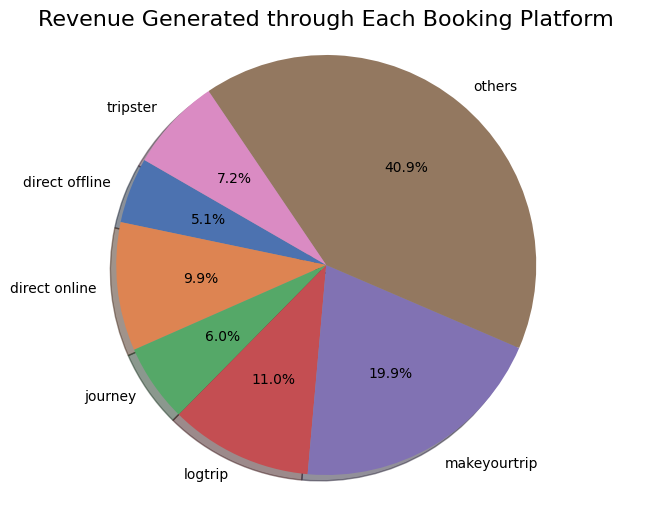

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
revenue_data = df_bookings.groupby('booking_platform')['revenue_realized'].sum()
plt.pie(revenue_data, 
        labels=revenue_data.index,  # After grouping the booking_platform becomes the index
        colors=sns.color_palette("deep"),  # Use a color palette from Seaborn
        autopct='%1.1f%%', 
        startangle=150, 
        shadow=True)
plt.axis('equal')
plt.title('Revenue Generated through Each Booking Platform', fontsize=16)
plt.show()


My linkedin profile-https://www.linkedin.com/in/nirmal-simon-36b1b6207/